## Import libraries

In [1]:
from fastai.vision.all import *

np.random.seed(42) # numpy
torch.manual_seed(42) # pytorch
random.seed(42) # python

/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

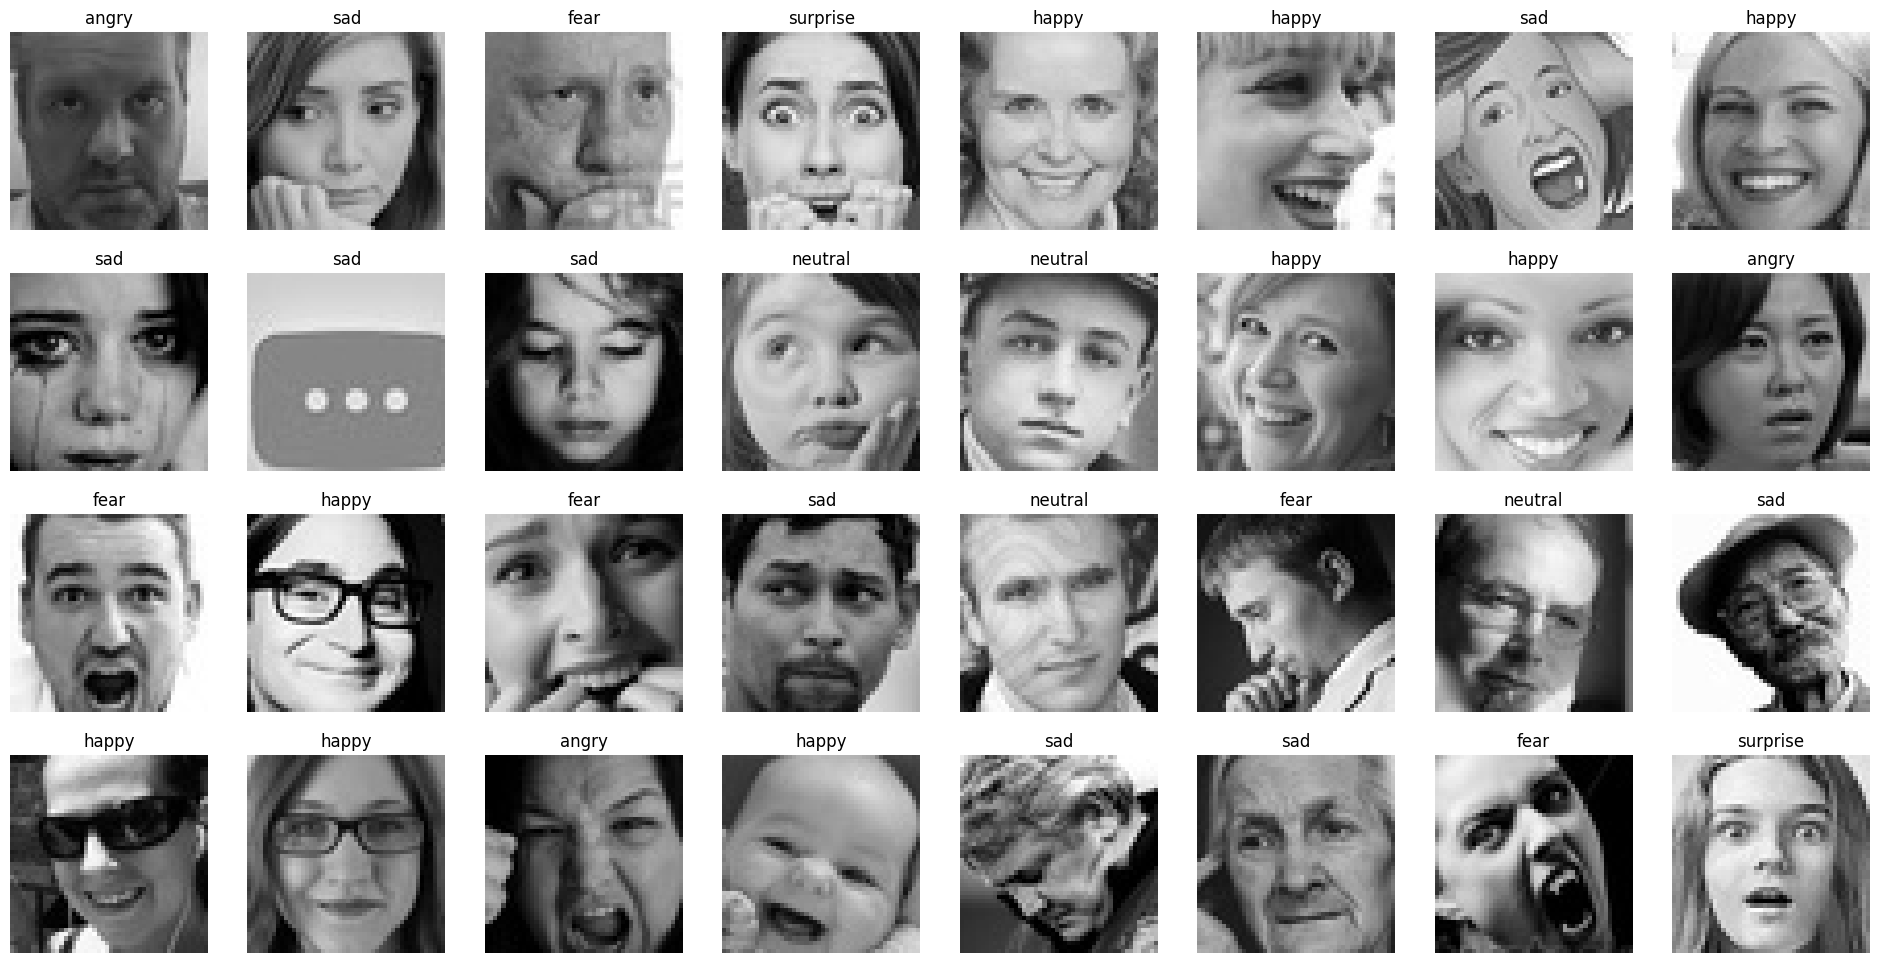

In [2]:
# Create DataBlock
dls = ImageDataLoaders.from_folder("../data/fer-2013/", train='train', valid='test', bs=64, item_tfms=Resize(48))

# Show batch
dls.show_batch(max_n=32, ncols=8)

In [3]:
def save_learner_metrics(learner, path):

    # Get the metric names
    cols = learner.recorder.metric_names[1:-1]
    
    # Get the values from the recorder to df
    df = pd.DataFrame(learner.recorder.values, columns=cols)

    # Create a new column with the epoch number
    df['epoch'] = df.index + 1

    # Move epoch column to the front
    cols = list(df.columns[-1:]) + list(df.columns[:-1])
    df = df[cols]

    # Save to csv
    df.to_csv(path, index=False)

## Model selection & tuning

/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet169_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet169_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /Users/nmirabets/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:01<00:00, 50.7MB/s]


/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/nmirabets/Documents/data-science/repos/emotion-recognition/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


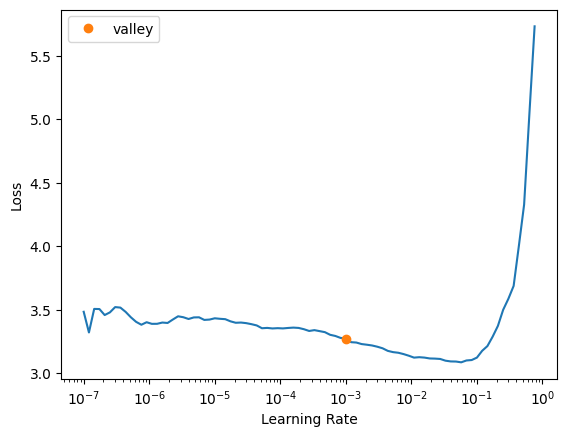

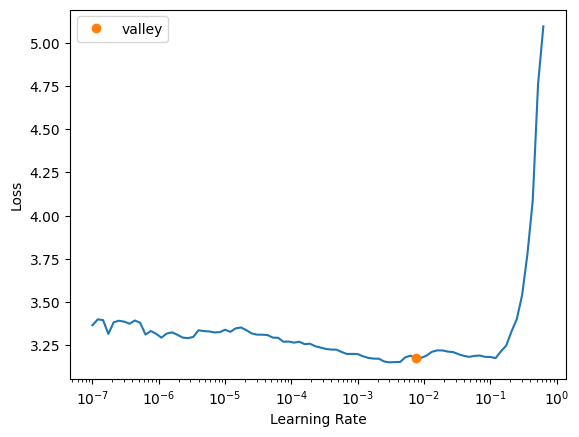

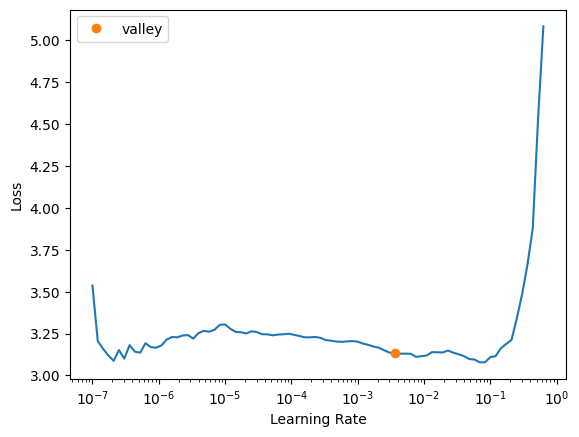

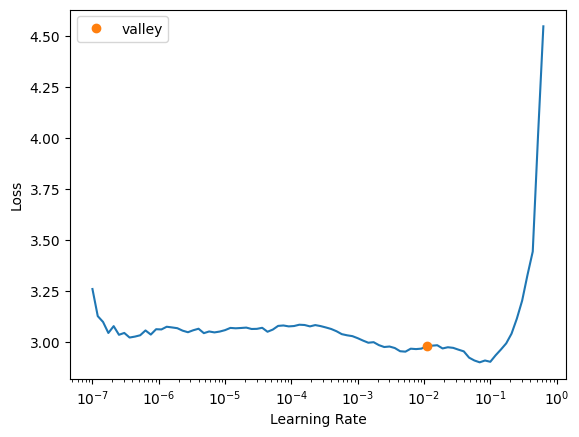

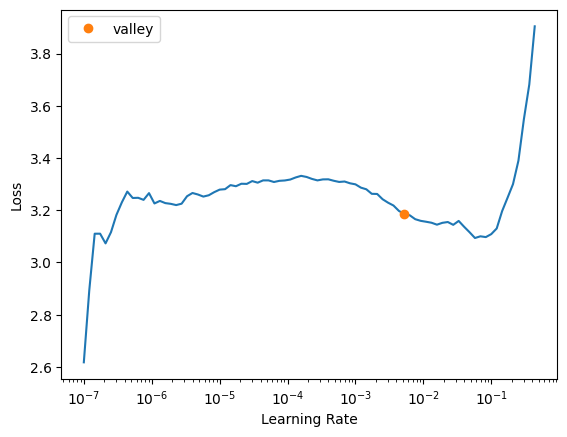

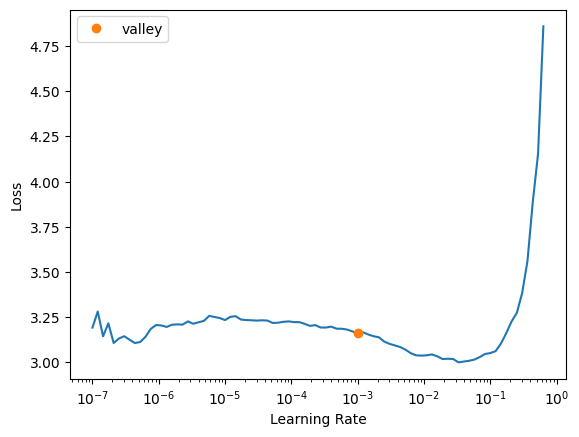

In [9]:
#Define base path
base_path = Path('/Users/nmirabets/Documents/data-science/repos/emotion-recognition')

# Define train_id
train_id = 'fa_train_4'

# Define models to test
models_to_test = [resnet34, resnet50, densenet121, densenet169, vgg16_bn, vgg19_bn]

# Define epochs
epochs = 5

# Initialize list of learners
learners = []

for model in models_to_test: # Loop through the models

    # Create learner
    learn = vision_learner(dls, model, metrics=[accuracy], 
                            cbs=Recorder(valid_metrics=True, train_metrics=True, add_time=True))

    # Find optimal learning rate
    suggested_lr = learn.lr_find().valley

    # Train model
    learn.fine_tune(epochs, suggested_lr)

    # Define learner name
    learner_name = f'{train_id}_{model.__name__ }_epochs_{epochs}_lr_{round(suggested_lr,4)}'

    # Append learner to list
    learners.append({'name': learner_name, 'learner': learn})

    # Save metrics
    save_learner_metrics(learn, f'{base_path}/learner_metrics/{learner_name}.csv')

    # Save model
    learn.export(f'{base_path}/models/{learner_name}.pth')

## Model Evaluation

## Plot Learner Metrics



In [4]:
def plot_learner_metrics(learner):

    # Get the metric names
    cols = learner.recorder.metric_names[1:-1]
    
    # Get the values from the recorder to df
    df = pd.DataFrame(learner.recorder.values, columns=cols)

    # Create a new column with the epoch number
    df['epoch'] = df.index + 1

    # Move epoch column to the front
    cols = list(df.columns[-1:]) + list(df.columns[:-1])

    # Reorder the columns
    df = df[cols]

    # Display df
    display(df)

    # Get model name
    model_name = str(learner.model).split("(")[0]

    # Plot the loss vs. epoch chart
    plt.figure()
    plt.plot(range(1, epochs + 1), df['train_loss'], label='Training Loss')
    plt.plot(range(1, epochs + 1), df['valid_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Model: {model_name}')
    plt.legend()
    plt.show()

In [31]:
learners[4]['learner'].recorder.values

[(#2) [1.3721861839294434,0.662580132484436]]

Learner:  fa_train_4_resnet34_epochs_5_lr_0.001


Learner:  fa_train_4_resnet50_epochs_5_lr_0.0076


Learner:  fa_train_4_densenet121_epochs_5_lr_0.0036


Learner:  fa_train_4_densenet169_epochs_5_lr_0.011


Learner:  fa_train_4_vgg16_bn_epochs_5_lr_0.0052


Learner:  fa_train_4_vgg19_bn_epochs_5_lr_0.001


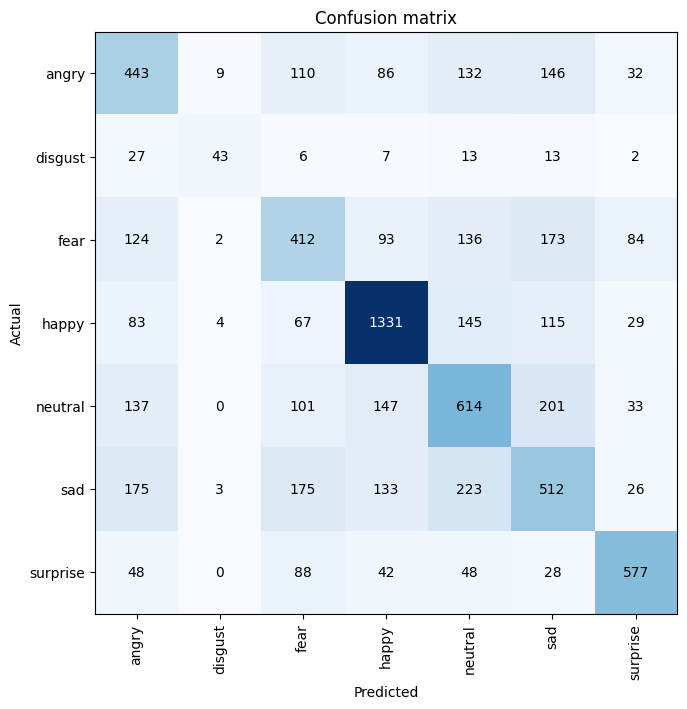

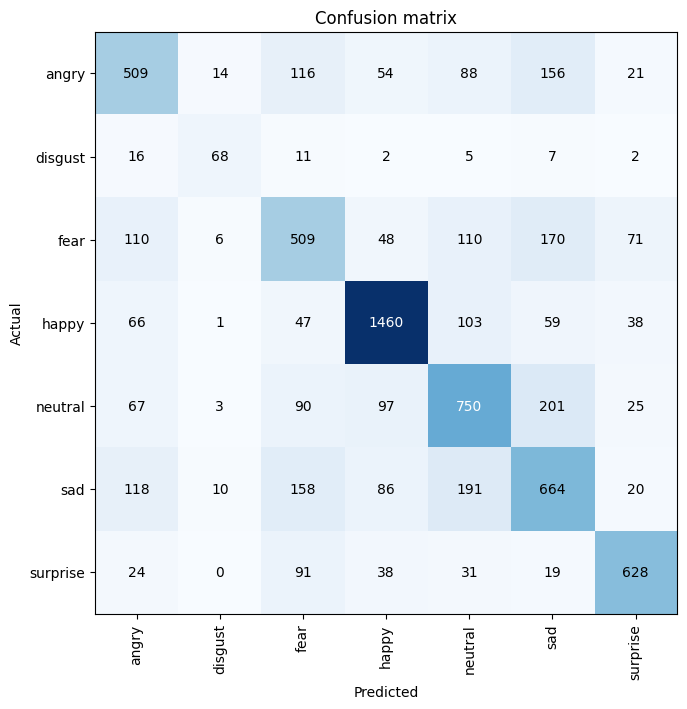

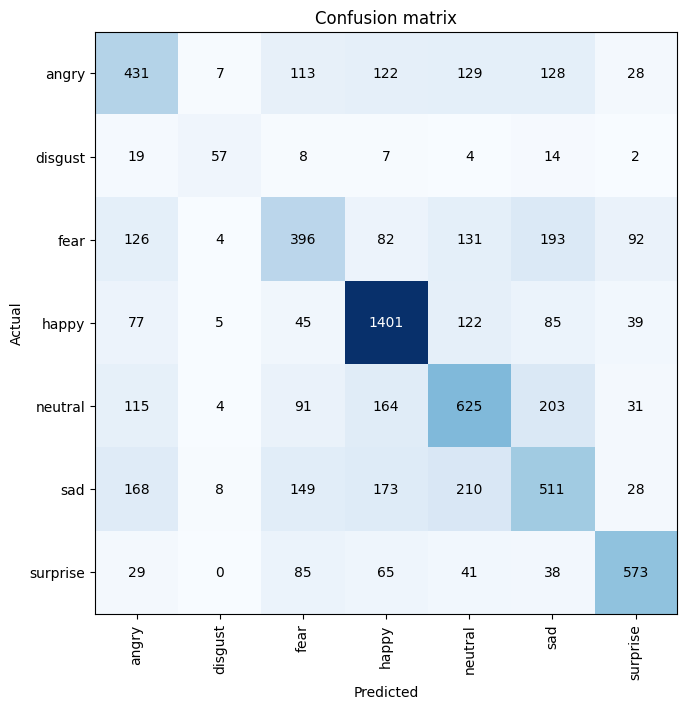

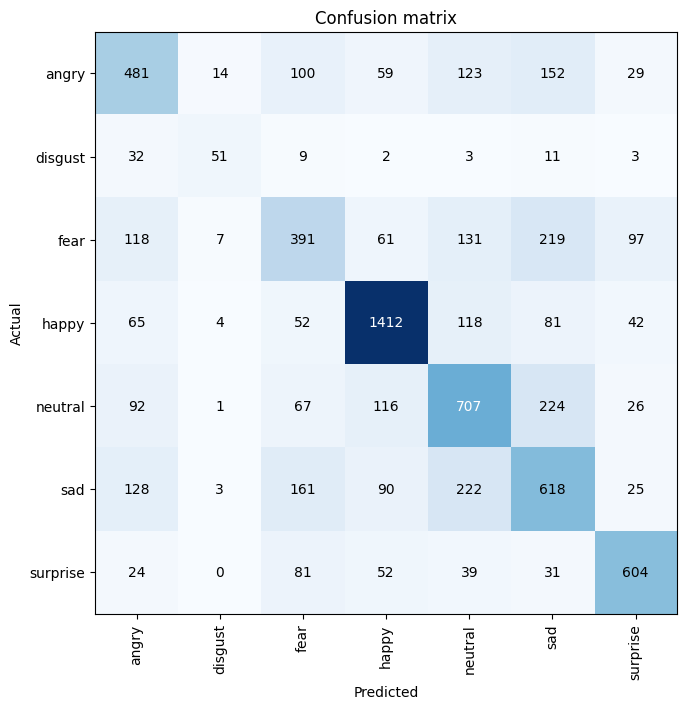

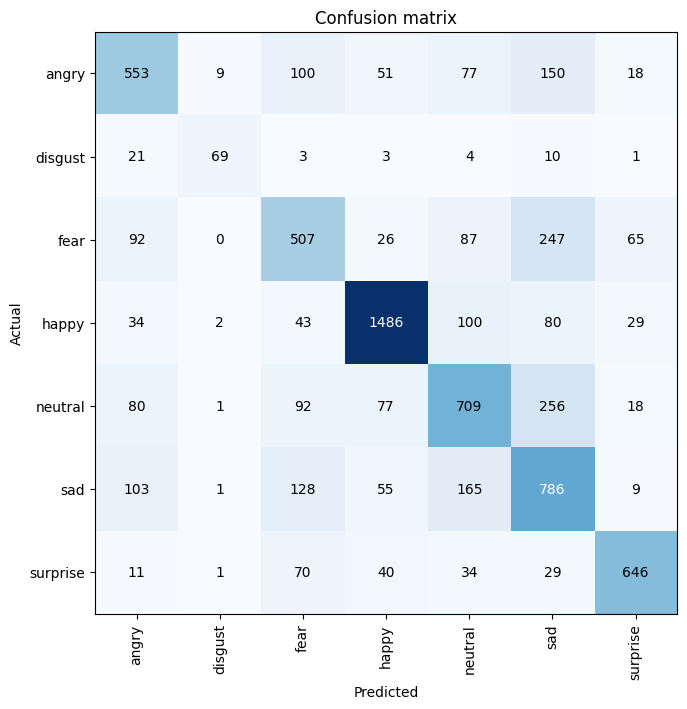

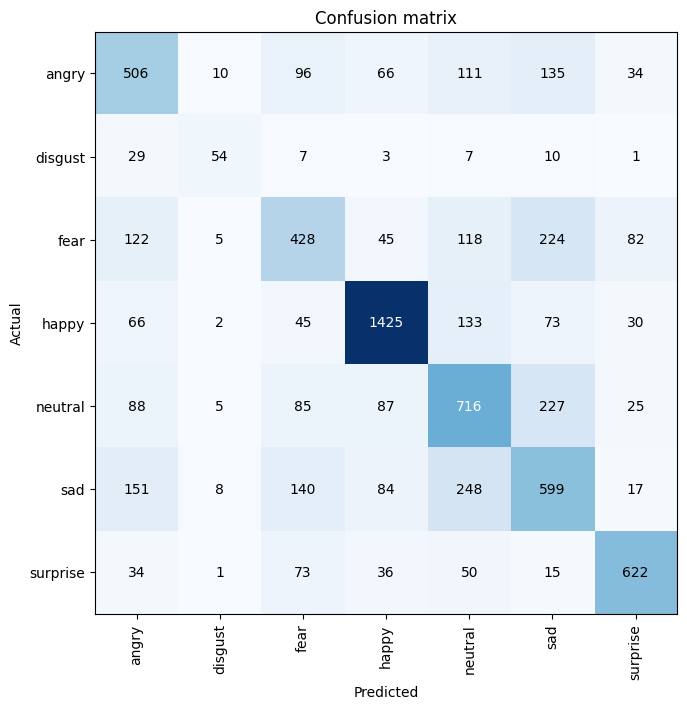

In [26]:
for learner in learners:
    print('Learner: ', learner['name'])
    #plot_learner_metrics(learner['learner'])
    interp = ClassificationInterpretation.from_learner(learner['learner'])
    losses,idxs = interp.top_losses()
    interp.plot_confusion_matrix(figsize=(7, 7), dpi=100)

## Plot results

In [18]:
learners[0].show_results()

AttributeError: 'dict' object has no attribute 'show_results'

### Confusion Matrix

### Prediction of Own Images

In [ ]:
# load png image to make predictions

# Convert NumPy array to PIL Image and use fastai's PILImage to ensure it's in the right format
img = PILImage.create("../data/test_predict/surprise.png")

# Resize and convert the image to grayscale
img = img.resize((48, 48))
img = img.convert("L")

# Convert back to fastai's PILImage
img = PILImage(img)

# Make predictions
predicted, tensor_indx, probs = learners[3].predict(img)

display(predicted)
display(tensor_indx)
display(probs)

predicted_emotion = str(predicted)
emotion_probability = probs[tensor_indx].item()

display(predicted_emotion) 
display(emotion_probability)